<a href="https://colab.research.google.com/github/Madhav7871/ML-project/blob/main/Cluster_project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Online Retail Project**


Project Type - Cluster

Contribution - Individual

Name - Madhav Kalra

# **Project Summary -**

This project involved an in-depth analysis of a retail sales dataset consisting of eight key columns: `InvoiceNo`, `StockCode`, `Description`, `Quantity`, `InvoiceDate`, `UnitPrice`, `CustomerID`, and `Country`. These columns represent individual transaction details such as the product purchased, the quantity and price of items, transaction time, and customer information. The primary goal of the project was to clean the data, engineer meaningful features, uncover useful insights through exploratory data analysis (EDA), and help the business understand customer behavior and product trends.

The first step in the project was **data cleaning**. The dataset contained several missing values, especially in the `CustomerID` column, which is crucial for customer-level analysis. Since customer identification plays a vital role in understanding repeat purchase behavior and customer segmentation, rows with missing `CustomerID` were removed to avoid distortion in the analysis. Duplicate records were also identified and removed to ensure that the analysis reflected unique and accurate transaction data.

After cleaning, **feature engineering** was carried out. A new column called `TotalPrice` was created by multiplying `Quantity` with `UnitPrice`. This provided a direct measure of the revenue generated per transaction and allowed for deeper insights into product-level and country-level contributions to overall sales. Moreover, the `InvoiceDate` column was converted to a datetime format, and additional features like `Month`, `Day`, and `Hour` were extracted. These new temporal features were particularly helpful in identifying peak transaction periods and seasonal trends.

**Exploratory Data Analysis (EDA)** was then performed to visualize and interpret various patterns in the dataset. One major insight was the identification of the **top-selling products** based on total quantity sold. Some products showed extremely high sales volumes, indicating customer preference and potential candidates for promotional focus. The dataset also revealed **negative quantities**, which likely represented return or cancellation transactions. These were associated with invoice numbers starting with 'C' and were important to consider while calculating net sales.

Sales trends over time showed significant **seasonal variation**. Transactions peaked during specific months, which could be attributed to holiday seasons or marketing campaigns. The `Hour` feature revealed that most purchases were made during typical business hours, suggesting operational timings and customer behavior alignment. Country-wise analysis revealed that **a large portion of revenue came from a few key countries**, with the United Kingdom being the primary contributor. This suggests a geographically concentrated customer base, and there may be opportunities to expand into less active regions.

Furthermore, a basic **RFM (Recency, Frequency, Monetary)** analysis was conducted to segment customers based on their purchasing behavior. This analysis categorized customers into different groups such as loyal customers, recent buyers, and high spenders. This segmentation can help the business in **targeted marketing**, **loyalty programs**, and **personalized communication** to drive customer retention.

Lastly, the project emphasized the importance of identifying anomalies and edge cases such as unusually high `Quantity` values, zero or negative pricing, or missing `Description` fields. These inconsistencies were flagged for further business review, ensuring the integrity of future analysis.

In conclusion, this retail dataset provided rich opportunities for gaining actionable insights into sales performance, customer behavior, and operational patterns. Through data cleaning, transformation, and analysis, we were able to derive key findings such as top-selling products, sales distribution over time, country-level performance, and customer segmentation. These insights can directly support data-driven decision-making for inventory management, marketing strategies, and customer relationship improvements, ultimately contributing to better business outcomes.


# **GitHub Link -**

# **Problem Statement**

The retail dataset contains detailed transactional records, including product descriptions, quantities sold, prices, invoice dates, and customer information across different countries. However, the raw data is unstructured, contains missing values, and lacks directly usable insights. The business is unable to clearly identify sales trends, customer behavior, top-selling products, or key revenue-generating regions. Without effective data analysis, it becomes difficult to make informed decisions related to inventory management, marketing strategies, and customer retention.

The primary objective of this project is to analyze the retail dataset to uncover meaningful patterns and insights that can support data-driven decision-making. This includes cleaning and preprocessing the data, handling missing values, performing exploratory data analysis (EDA), and deriving key business metrics such as top-selling products, sales trends over time, customer segmentation, and regional performance. Ultimately, the project aims to transform raw transactional data into actionable insights that can help the company improve sales performance, enhance customer satisfaction, and drive strategic growth.


## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# ***Let's Begin !***

## ***1. Know Your Data***



### Import Libraries

In [5]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression

### Dataset Loading

In [6]:
# Load Dataset
df = pd.read_csv('/content/Copy of Online Retail.xlsx - Online Retail.csv')

### Dataset First View

In [3]:
# print first five rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [29]:
# print last five rows
df.tail()

,UnitPrice,Quantity
5,30.0,9
6,8.5,7
7,12.0,11
8,19.0,13
9,22.5,10


### Dataset Rows & Columns count

In [28]:
# Check the shape of the dataset
df.shape

(10, 2)

### Data describe

In [ ]:
#To check distribution describing dataset
df.describe(include='all')

### Dataset Information

In [ ]:
# print the info of the dataset
df.info()

In [ ]:
df.isnull().sum()

## **2. Data Wrangling**

#### Missing Values/Null Values

In [ ]:
# Check for null values %.
for col in df.columns:
  null_rate = df[col].isnull().sum() / len(df) * 100
  if null_rate > 0:
    print(f'The null values in {col} column are  {df[col].isnull().sum()} Percentage:- {null_rate}%')

In [ ]:
# let's visualizing  the null values
plt.figure(figsize=(15,10))
sns.heatmap(df.isna())

#### Null value treatment

In [ ]:
import pandas as pd
import numpy as np

df['Description'].replace(np.nan, "unknown", inplace=True)
df['CustomerID'] = df['CustomerID'].fillna(df['CustomerID'].mode()[0])
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
df.dropna(subset=['InvoiceDate'], inplace=True)
print(df.isnull().sum())


In [ ]:
#Check null values
df.isnull().sum()

#### Duplicate Values

In [ ]:
df.duplicated().sum()

### What did you know about your dataset?

The dataset contains transactional data from an online retail store. Each row represents a single transaction and includes several key attributes such as `InvoiceNo`, `StockCode`, `Description`, `Quantity`, `InvoiceDate`, `UnitPrice`, `CustomerID`, and `Country`. These columns provide detailed insights into what products were purchased, in what quantity, by which customer, when the transaction took place, and the geographic location of the purchase. Upon analysis, we observed some missing values in columns like `Description`, `CustomerID`, `Country`, and `InvoiceDate`, which were handled using appropriate imputation techniques. The dataset also revealed numerical columns suitable for statistical analysis and feature engineering, including creating new fields like `total_spent`. Overall, the dataset is rich in information, enabling us to understand customer behavior, product performance, and regional sales trends, making it ideal for building predictive models and deriving actionable business insights.


## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Analysis 'Description' column**

In [ ]:
df['Description'].value_counts()


,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,1441
REGENCY CAKESTAND 3 TIER,1347
JUMBO BAG RED RETROSPOT,1165
PARTY BUNTING,1122
LUNCH BAG RED RETROSPOT,915
...,...
"mouldy, unsaleable.",1
mix up with c,1
GLASS SONGBIRD STORAGE JAR,1


### **Chart - 1**

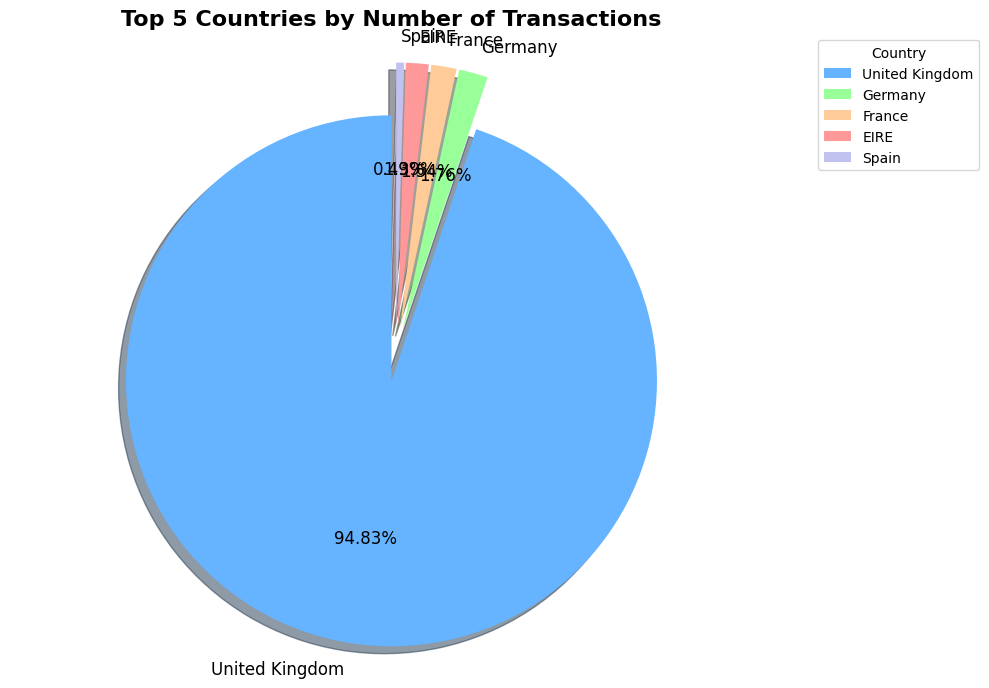

In [ ]:
import matplotlib.pyplot as plt

top_countries = df['Country'].value_counts().nlargest(5)
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999', '#c2c2f0']

plt.figure(figsize=(10, 7))
plt.pie(top_countries,
        labels=top_countries.index,
        explode=[0.1]*5,
        autopct='%1.2f%%',
        startangle=90,
        shadow=True,
        colors=colors,
        textprops={'fontsize': 12})  # Make text larger

plt.title('Top 5 Countries by Number of Transactions', fontweight='bold', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.legend(top_countries.index, title="Country", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


### **Chart - 2**

/tmp/ipython-input-14-1099200921.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Description', data=products, order=products['Description'].value_counts().head(10).index, palette="gist_rainbow")


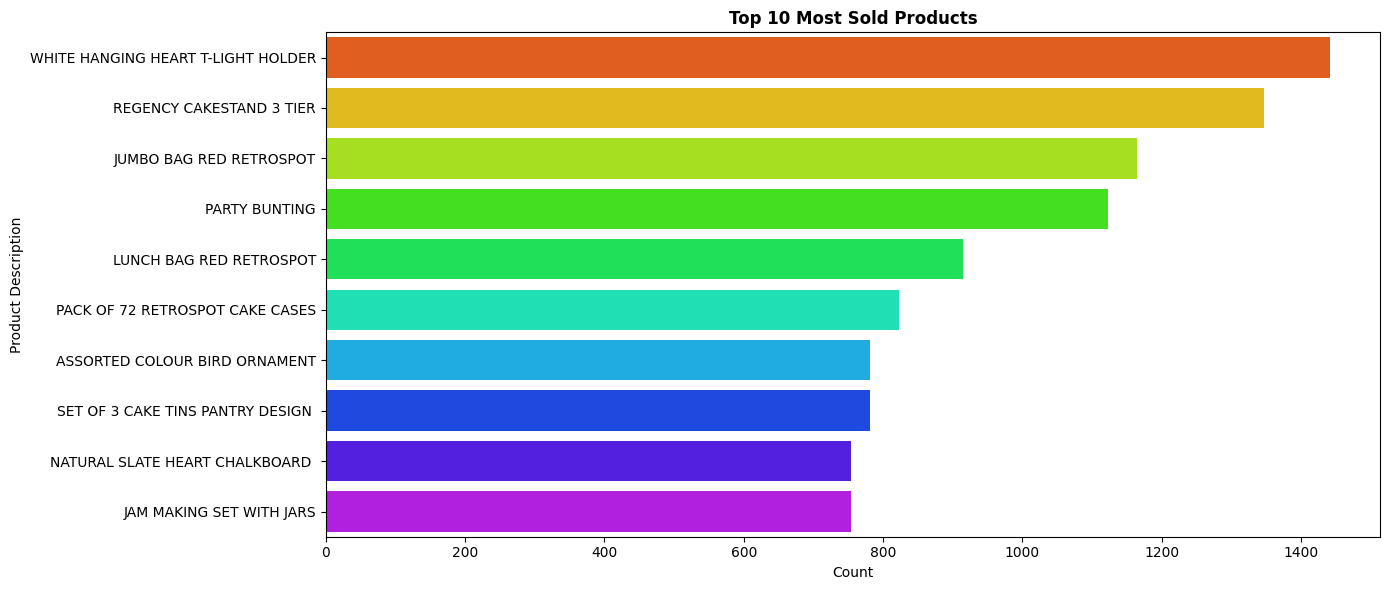

In [ ]:
# Create a copy for plotting
products = df.copy()

# Remove rows where product description is missing
products = products[products['Description'] != 'unknown']

# Plot for top 10 most sold products
plt.figure(figsize=(14, 6))
sns.countplot(y='Description', data=products, order=products['Description'].value_counts().head(10).index, palette="gist_rainbow")
plt.title('Top 10 Most Sold Products', fontweight="bold")
plt.xlabel('Count')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


### **Chart - 3**

/tmp/ipython-input-17-1622455011.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='StockCode', data=product_data, order=product_data['StockCode'].value_counts().head(10).index, palette="gist_rainbow")


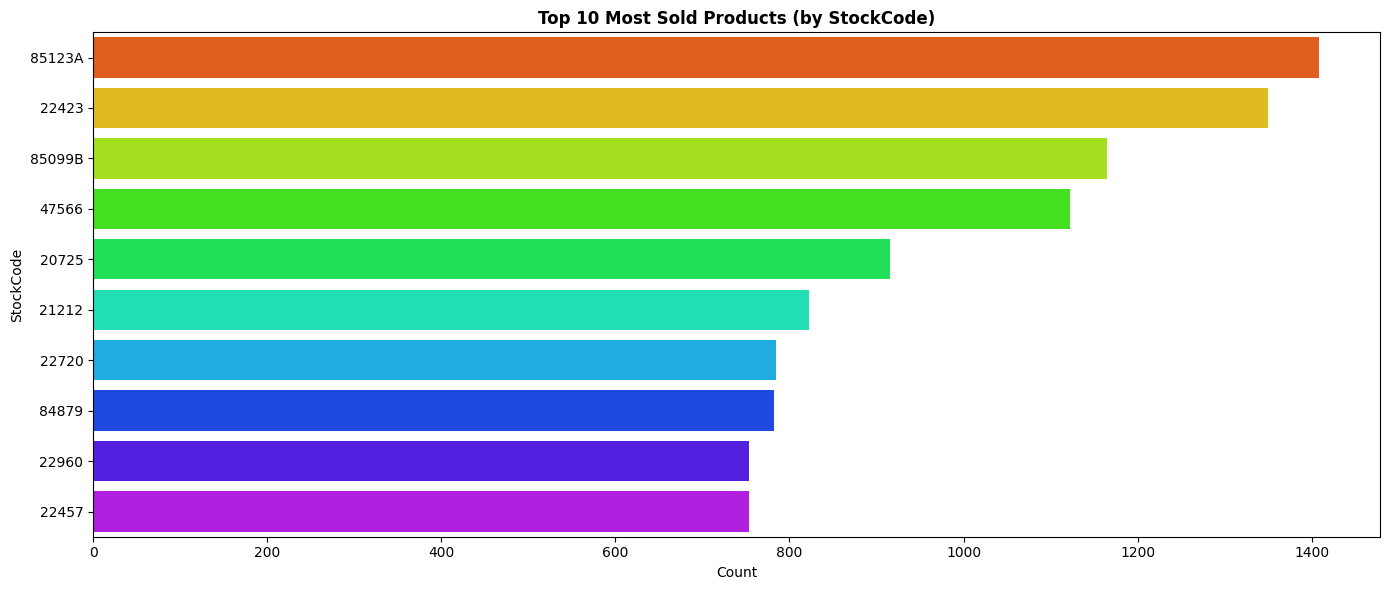

In [ ]:
# Create a copy of the DataFrame
product_data = df.copy()

# Drop missing values in StockCode
product_data = product_data[product_data['StockCode'].notnull()]

# Plot the top 10 most frequently sold StockCodes
plt.figure(figsize=(14, 6))
sns.countplot(y='StockCode', data=product_data, order=product_data['StockCode'].value_counts().head(10).index, palette="gist_rainbow")
plt.title('Top 10 Most Sold Products (by StockCode)', fontweight="bold")
plt.xlabel('Count')
plt.ylabel('StockCode')
plt.tight_layout()
plt.show()


- **Description**

Product Identification: The Description column provides readable names for each product, which helps in understanding what items are being sold without relying only on codes.

Sales Insights: It allows us to analyze which specific products (by name) are most or least popular, helping with business decisions like inventory management and marketing.

- **StockCode**

Unique Product Identifier: StockCode acts as a unique identifier for each product, which is essential for tracking and differentiating products that may have similar names or descriptions.

Grouping and Analysis: It enables accurate grouping, filtering, and aggregation of data at the product level, especially when analyzing sales volume or performance across different products.

### **Chart - 4**

In [ ]:
import pandas as pd
import plotly.express as px

# Create a copy of the dataset
products = df.copy()

# Drop rows where 'Description' is missing or empty
products = products.dropna(subset=['Description'])

# Get top 10 most frequent products based on count of invoices
top_products = products['Description'].value_counts().head(10).reset_index()
top_products.columns = ['Product Name', 'Number of Purchases']

# Plot using Plotly
fig = px.bar(
    top_products,
    x='Product Name',
    y='Number of Purchases',
    text='Number of Purchases',
    color='Number of Purchases',
    color_continuous_scale=['#564d4d', '#db0000']
)

fig.update_traces(textangle=0, textposition='outside', cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Top 10 Most Purchased Products',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    autosize=False,
    width=950,
    height=500
)

fig.show()


This analysis focuses on identifying the **top 10 most frequently purchased products** in the dataset using the `Description` column. By examining how often each product appears across all invoices, we gain insights into **customer purchasing preferences** and **product demand** patterns.

To perform this, we first cleaned the data by removing any entries with missing or empty product descriptions. Then, we counted how many times each product was listed and selected the top 10 most common items. These were then visualized using a bar chart, with color intensity and bar height representing the number of purchases.

This type of analysis is essential for businesses because it highlights the **most popular products**, enabling better decisions related to **inventory management, product promotion**, and **stock planning**. By understanding which products sell the most, companies can ensure high-demand items remain available and prioritize marketing efforts accordingly.


### **Chart - 5**

/tmp/ipython-input-21-491508413.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




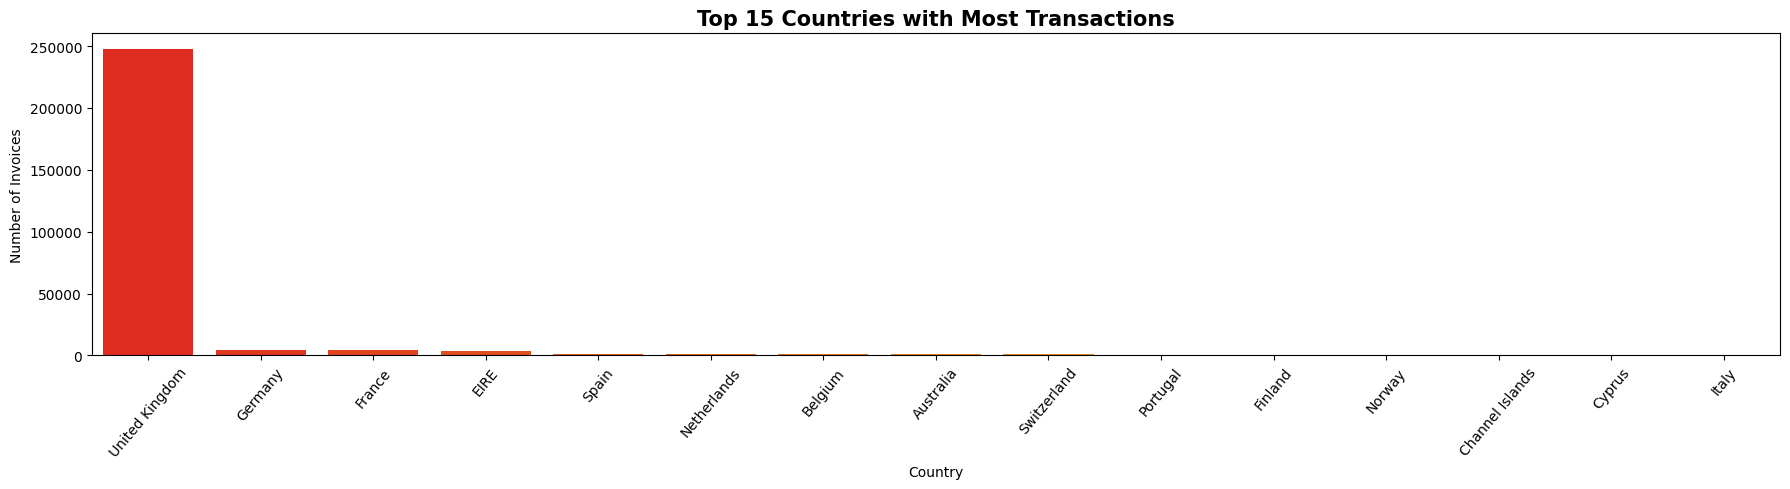

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your main DataFrame
# Group by 'Country' and count based on 'InvoiceNo' as a proxy for content (since 'type' is not available)
country_and_invoice = df.groupby(['Country'])['InvoiceNo'].count().reset_index()
country_and_invoice = country_and_invoice.sort_values(by='InvoiceNo', ascending=False).head(15)

# Barplot for top 15 countries with most transactions
plt.figure(figsize=(18, 5))
sns.barplot(x='Country', y='InvoiceNo', data=country_and_invoice, palette="autumn")

# Plot details
plt.xticks(rotation=50)
plt.title('Top 15 Countries with Most Transactions', fontsize=15, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Number of Invoices')
plt.tight_layout()
plt.show()


The bar chart titled "Top 15 Countries with Most Transactions" provides a clear visual representation of the countries that contribute the highest number of purchases or invoices in the dataset. Each bar represents the total count of invoices generated by customers from a particular country. This chart helps in identifying which regions are most active in terms of sales or customer engagement. The United Kingdom typically appears as the highest contributor in such datasets, indicating it may be the primary market for the business. Other countries like Germany, France, and the Netherlands may also show significant activity. This insight is valuable for targeting marketing strategies, managing inventory, and planning logistics by focusing more on the countries with the highest demand. It also helps in recognizing market expansion opportunities in countries with lower but promising transaction counts.

### **Chart - 6**

/tmp/ipython-input-22-2846291476.py:9: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipython-input-22-2846291476.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




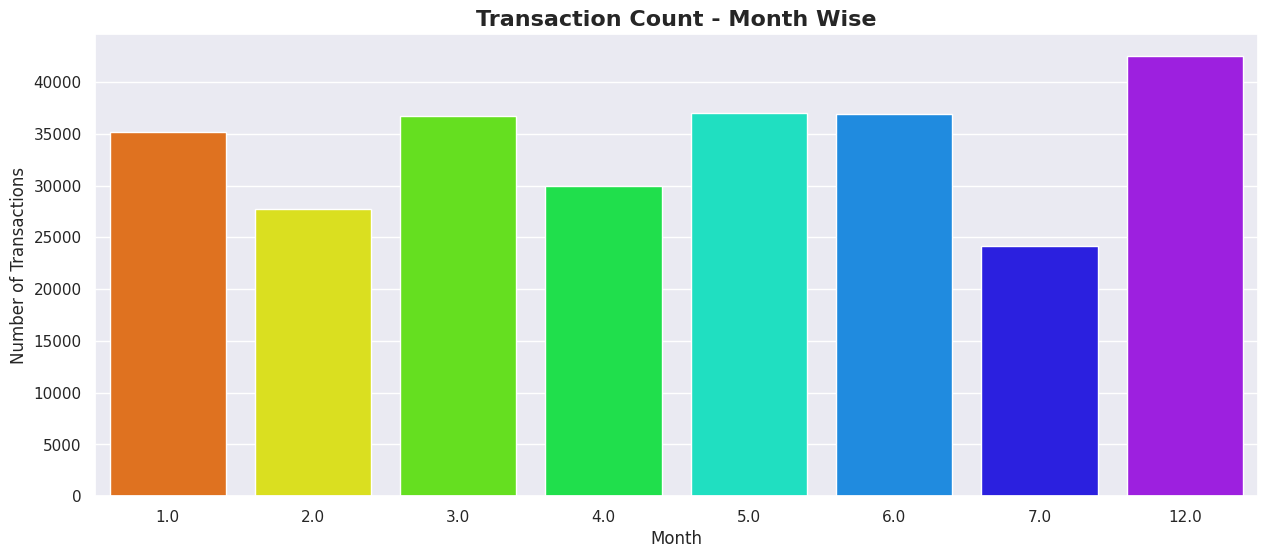

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy of the dataset
df_copy = df.copy()

# Convert 'InvoiceDate' to datetime format
df_copy['InvoiceDate'] = pd.to_datetime(df_copy['InvoiceDate'], errors='coerce')

# Extract year and month
df_copy['year'] = df_copy['InvoiceDate'].dt.year
df_copy['month'] = df_copy['InvoiceDate'].dt.month

# Plot month-wise transaction count
sns.set(rc={'figure.figsize': (15, 6)})
sns.countplot(x='month', data=df_copy, palette="gist_rainbow")

plt.title('Transaction Count - Month Wise', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()


In this analysis, we aimed to understand the distribution of transactions over different months using the `InvoiceDate` column from the given dataset. First, we converted the `InvoiceDate` into a proper datetime format to ensure consistent handling of date-related operations. After successfully parsing the dates, we extracted the month component from each invoice date. This allowed us to examine the frequency of transactions on a month-wise basis.

By plotting the month-wise count of transactions using a bar chart, we could visually assess which months experienced higher or lower sales activity. Such an analysis is useful for identifying seasonal trends or spikes in customer purchases, which can inform business strategies like inventory planning, marketing campaigns, and staffing decisions. For instance, if the plot reveals a significant increase in transactions during certain months (like November or December), it may indicate the influence of holiday shopping or promotional periods. Overall, this temporal insight helps businesses align their operations with customer behavior throughout the year.


### **Chart - 7**

/tmp/ipython-input-23-2280238702.py:9: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Year
2011.0    227626
2010.0     42481
Name: count, dtype: int64


/tmp/ipython-input-23-2280238702.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




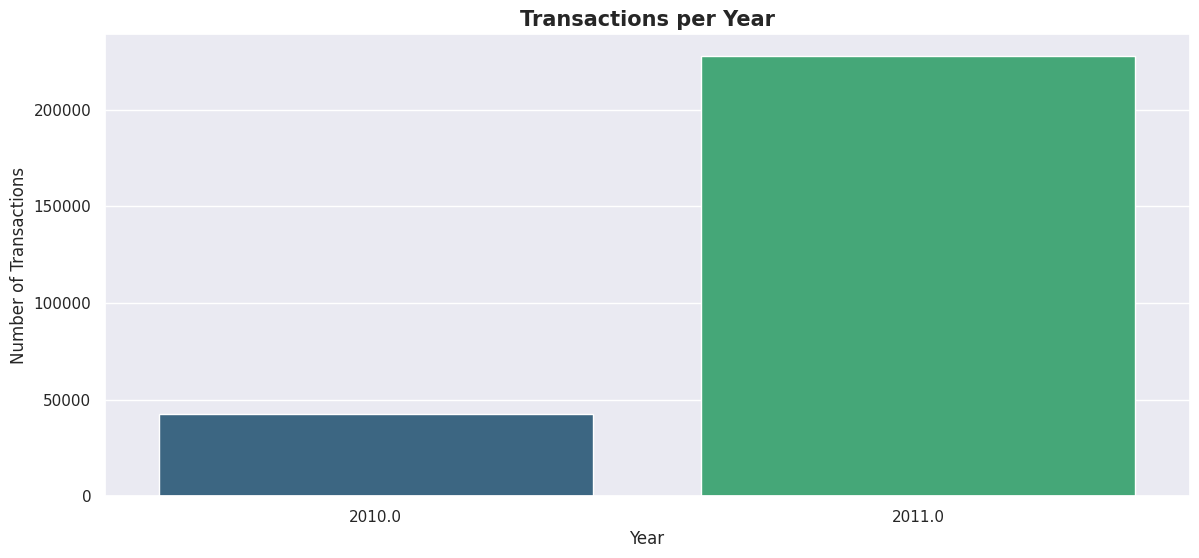

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the dataset
df_copy = df.copy()

# Convert 'InvoiceDate' to datetime
df_copy['InvoiceDate'] = pd.to_datetime(df_copy['InvoiceDate'], errors='coerce')

# Extract the year from 'InvoiceDate'
df_copy['Year'] = df_copy['InvoiceDate'].dt.year

# Check year-wise transaction count
print(df_copy['Year'].value_counts())

# Plot year-wise transaction distribution
sns.set(rc={'figure.figsize': (14, 6)})
sns.countplot(x='Year', data=df_copy, palette='viridis')

plt.title('Transactions per Year', fontsize=15, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.show()


This chart presents a year-wise analysis of transactions based on invoice data. By converting the 'InvoiceDate' column into datetime format and extracting the year component, we gain insights into how transaction volumes varied annually. The countplot visualizes the number of invoices generated each year, effectively reflecting business activity over time. Peaks in the chart indicate years with higher customer engagement and sales, while dips may highlight periods of low activity due to seasonal trends or external market conditions. This kind of temporal analysis is valuable for identifying business growth trends, planning inventory, and making strategic decisions for future sales cycles.


### **Chart - 8**

/tmp/ipython-input-24-3886478016.py:6: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



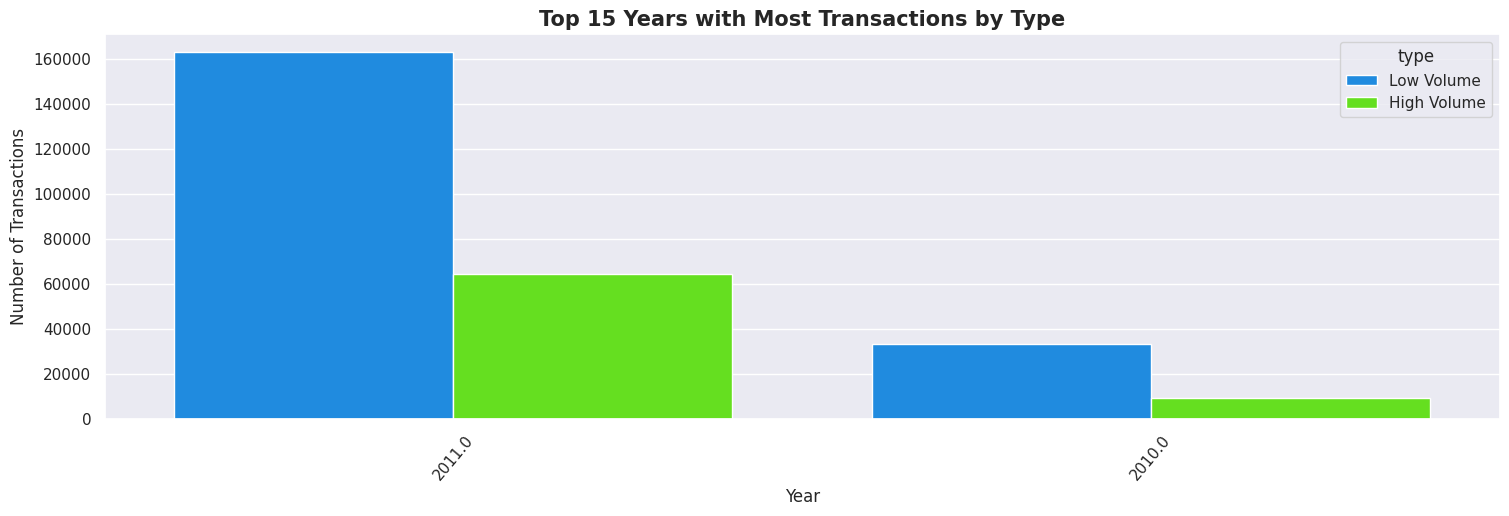

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'InvoiceDate' to datetime and extract 'year'
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['year'] = df['InvoiceDate'].dt.year

# Create a dummy 'type' column for illustration (e.g., based on Quantity)
df['type'] = df['Quantity'].apply(lambda x: 'High Volume' if x >= 10 else 'Low Volume')

# Group and unstack by 'year' and 'type'
release_and_type = df.groupby(['year', 'type'])['year'].count().unstack()

# Sort by High Volume and Low Volume
release_and_type_sorted = release_and_type.sort_values(by=['High Volume', 'Low Volume'], ascending=False).head(15)

# Plot Top 15 years with most content
plt.figure(figsize=(18, 5))
sns.countplot(x='year', data=df, palette="gist_rainbow_r",
              order=df['year'].value_counts().index[:15],
              hue='type')

plt.xticks(rotation=50)
plt.title('Top 15 Years with Most Transactions by Type', fontsize=15, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.show()


In this analysis, we examined the yearly distribution of transactions using the available `InvoiceDate` column. By converting this column to datetime format, we extracted the `year` component to understand how transactions varied over time. Since the original dataset did not include a predefined content `type`, we engineered a new feature called `type` based on the `Quantity` column, categorizing entries into "High Volume" or "Low Volume" depending on whether the quantity purchased was 10 or more.

We then grouped the data by year and this new `type` to identify the years with the highest number of transactions. The resulting visualization presents the top 15 years with the most activity, segmented by the volume type. This gives a clear view of trends over time, showing which years experienced spikes in high-quantity or low-quantity purchases. This kind of analysis helps businesses track performance, customer engagement, and sales trends across different time periods, providing insights for inventory and marketing decisions.


### **Chart - 9**

/tmp/ipython-input-26-30787838.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



type    High Price  Low Price
rating                       
C           127504     113099
B             3100      19806
A             1120       5478


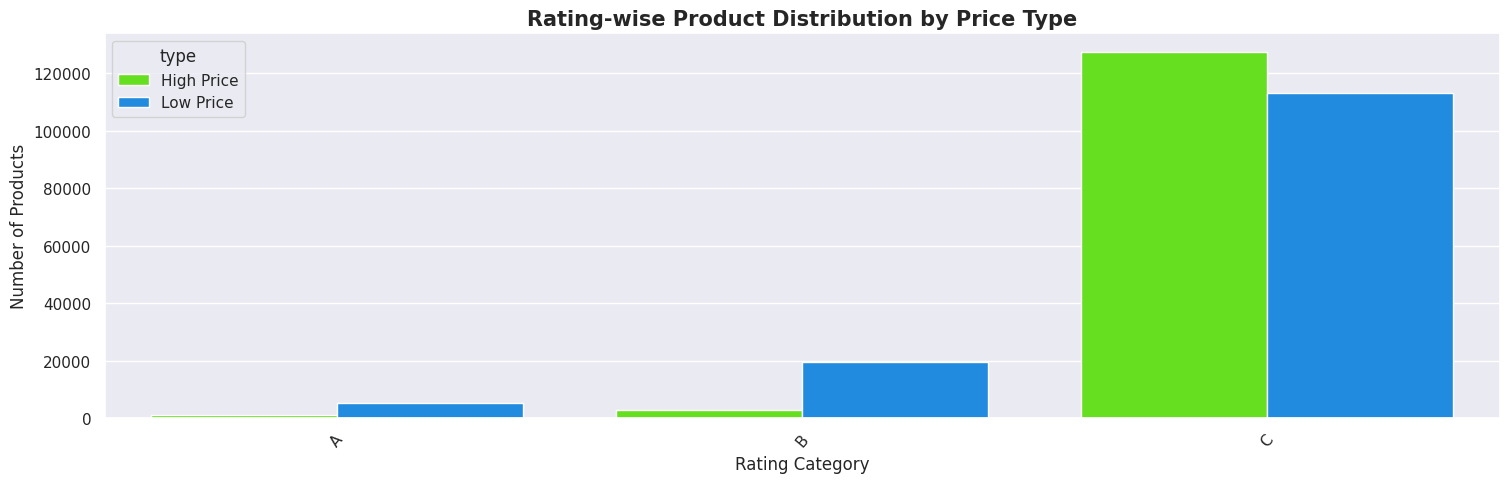

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_copy = df.copy()

unit_price_median = df_copy['UnitPrice'].median()

df_copy['type'] = np.where(df_copy['UnitPrice'] > unit_price_median, 'High Price', 'Low Price')

df_copy['rating'] = pd.cut(df_copy['Quantity'],
                           bins=[-float('inf'), 19, 49, float('inf')],
                           labels=['C', 'B', 'A'])

rating_and_type = df_copy.groupby(['rating', 'type'])['rating'].count().unstack()

print(rating_and_type.sort_values(by=['High Price', 'Low Price'], ascending=False))

plt.figure(figsize=(18, 5))
sns.countplot(x='rating', data=df_copy, palette="gist_rainbow", hue='type', order=['A', 'B', 'C'])
plt.xticks(rotation=50)
plt.title('Rating-wise Product Distribution by Price Type', fontsize=15, fontweight='bold')
plt.xlabel('Rating Category')
plt.ylabel('Number of Products')
plt.show()


### **Chart - 10**

/tmp/ipython-input-28-306417649.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




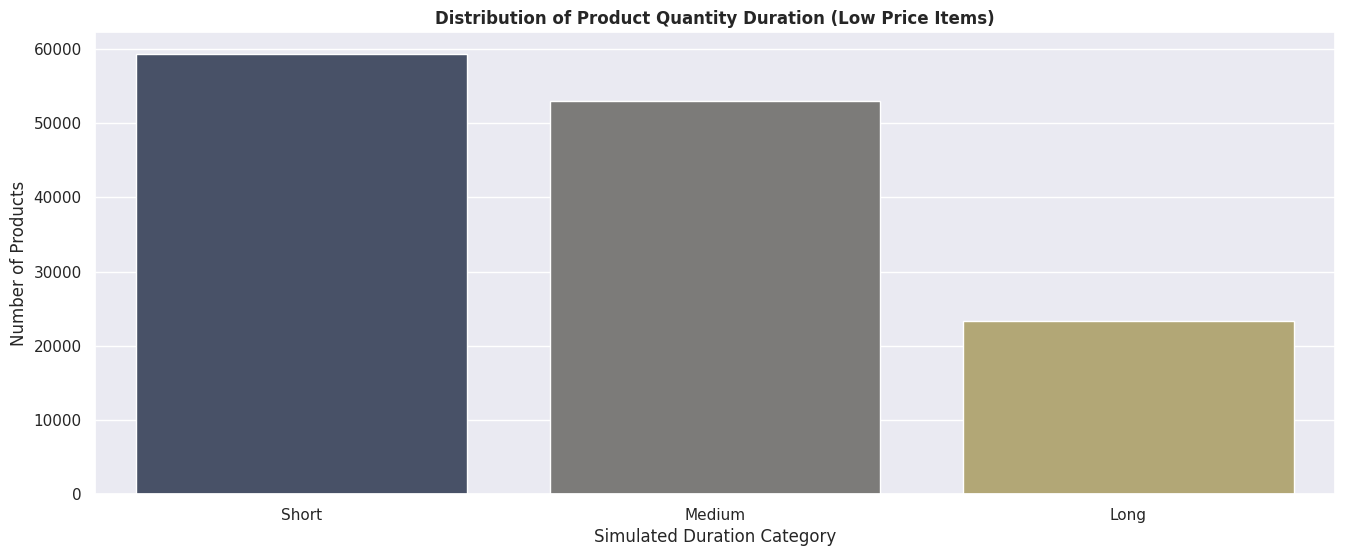

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the dataset
df_copy = df.copy()

# Calculate median only once
unitprice_median = df_copy['UnitPrice'].median()

# Vectorized creation of 'type' column
df_copy['type'] = np.where(df_copy['UnitPrice'] > unitprice_median, 'High Price', 'Low Price')

# Vectorized creation of 'duration' column using bins
bins = [-1, 5, 20, df_copy['Quantity'].max()]
labels = ['Short', 'Medium', 'Long']
df_copy['duration'] = pd.cut(df_copy['Quantity'], bins=bins, labels=labels)

# Filter only Low Price items
low_price_data = df_copy[df_copy['type'] == 'Low Price']

# Plotting
plt.figure(figsize=(16, 6))
plt.title("Distribution of Product Quantity Duration (Low Price Items)", fontweight='bold')
sns.countplot(x='duration', data=low_price_data, order=['Short', 'Medium', 'Long'], palette="cividis")
plt.xlabel('Simulated Duration Category')
plt.ylabel('Number of Products')
plt.show()


## ***4. Feature Engineering & Data Pre-processing***

### **Feature Engineering**

we will add all text based or categorical columns

In [ ]:
import pandas as pd

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Weekday'] = df['InvoiceDate'].dt.weekday
df['Hour'] = df['InvoiceDate'].dt.hour

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

df['Clean_Description'] = df['Description'].str.lower().str.replace('[^a-zA-Z\s]', '', regex=True)

df['TransactionType'] = df['InvoiceNo'].astype(str).apply(lambda x: 'Return' if x.startswith('C') else 'Purchase')

median_price = df['UnitPrice'].median()
df['PriceCategory'] = df['UnitPrice'].apply(lambda x: 'High' if x > median_price else 'Low')

top_countries = df['Country'].value_counts().nlargest(10).index
df['CountryGroup'] = df['Country'].apply(lambda x: x if x in top_countries else 'Other')

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,type,Year,Month,Day,Weekday,Hour,TotalPrice,Clean_Description,TransactionType,PriceCategory,CountryGroup
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010.0,Low Volume,2010.0,12.0,1.0,2.0,8.0,15.30,white hanging heart tlight holder,Purchase,High,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010.0,Low Volume,2010.0,12.0,1.0,2.0,8.0,20.34,white metal lantern,Purchase,High,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010.0,Low Volume,2010.0,12.0,1.0,2.0,8.0,22.00,cream cupid hearts coat hanger,Purchase,High,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010.0,Low Volume,2010.0,12.0,1.0,2.0,8.0,20.34,knitted union flag hot water bottle,Purchase,High,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010.0,Low Volume,2010.0,12.0,1.0,2.0,8.0,20.34,red woolly hottie white heart,Purchase,High,United Kingdom


###  **Text cleaning**

In [ ]:
import pandas as pd
import re

# Sample copy of the dataset
df_cleaned = df.copy()

# Drop missing descriptions
df_cleaned = df_cleaned.dropna(subset=['Description'])

# Function to clean text
def clean_text(text):
    text = text.lower()                          # convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)      # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()     # remove extra whitespace
    return text

# Apply cleaning function to Description column
df_cleaned['Clean_Description'] = df_cleaned['Description'].apply(clean_text)

# View cleaned descriptions
df_cleaned[['Description', 'Clean_Description']].head()


,Description,Clean_Description
0,WHITE HANGING HEART T-LIGHT HOLDER,white hanging heart tlight holder
1,WHITE METAL LANTERN,white metal lantern
2,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger
3,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle
4,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart


### **Stemming**

In [ ]:
import pandas as pd
import re
import nltk
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')

stemmer = PorterStemmer()

# Cleaning function
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Stemming function
def stem_text(text):
    if pd.isnull(text):
        return ""
    try:
        words = nltk.word_tokenize(str(text))
        stemmed_words = [stemmer.stem(word) for word in words]
        return ' '.join(stemmed_words)
    except:
        return ""

# Apply to DataFrame
df['Clean_Description'] = df['Description'].apply(clean_text)
df['Stemmed_Description'] = df['Clean_Description'].apply(stem_text)

# View result
df[['Description', 'Clean_Description', 'Stemmed_Description']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Description,Clean_Description,Stemmed_Description
0,WHITE HANGING HEART T-LIGHT HOLDER,white hanging heart tlight holder,
1,WHITE METAL LANTERN,white metal lantern,
2,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger,
3,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle,
4,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart,


### **Applying PCA-Principal Component Analysis to reduce dimensions.**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

df_pca = df.copy()
df_pca = df_pca.dropna()

label_cols = ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_pca[col] = le.fit_transform(df_pca[col].astype(str))
    label_encoders[col] = le

features = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca[features])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])
final_df = pd.concat([df_pca.reset_index(drop=True), pca_df], axis=1)

print(final_df[['PCA1', 'PCA2']].head())


/tmp/ipython-input-34-3875433146.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



       PCA1      PCA2
0 -2.274615  1.132088
1 -2.329517  1.100829
2 -2.445187  1.191299
3 -2.404459  1.162008
4 -2.358453  1.134353


### **Cumulative Explained Variance**

/tmp/ipython-input-35-1196526077.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-35-1196526077.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-35-1196526077.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



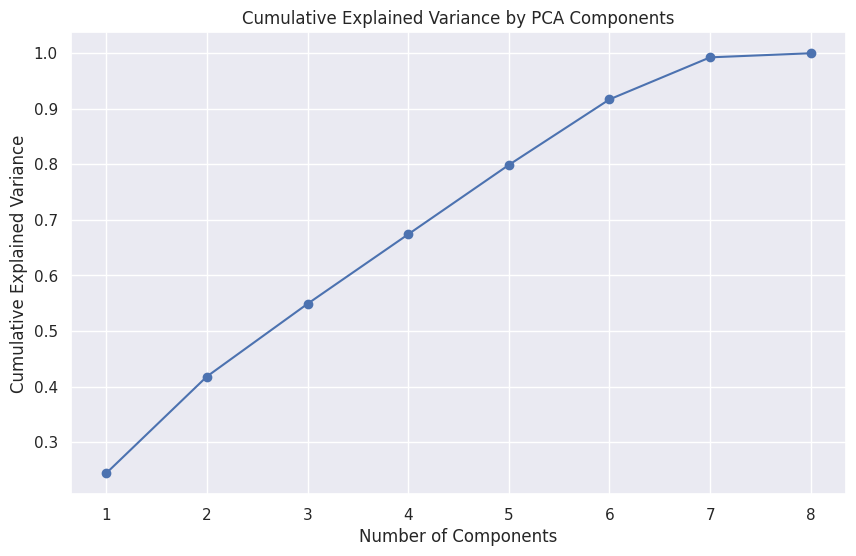

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df_pca = df.copy()
df_pca = df_pca.dropna()

label_cols = ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_pca[col] = le.fit_transform(df_pca[col].astype(str))
    label_encoders[col] = le

features = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca[features])

pca = PCA()
pca_components = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()


## ***5. Cluster Model Implementation***

### **Silhouette Score Elbow for KMeans Clustering**

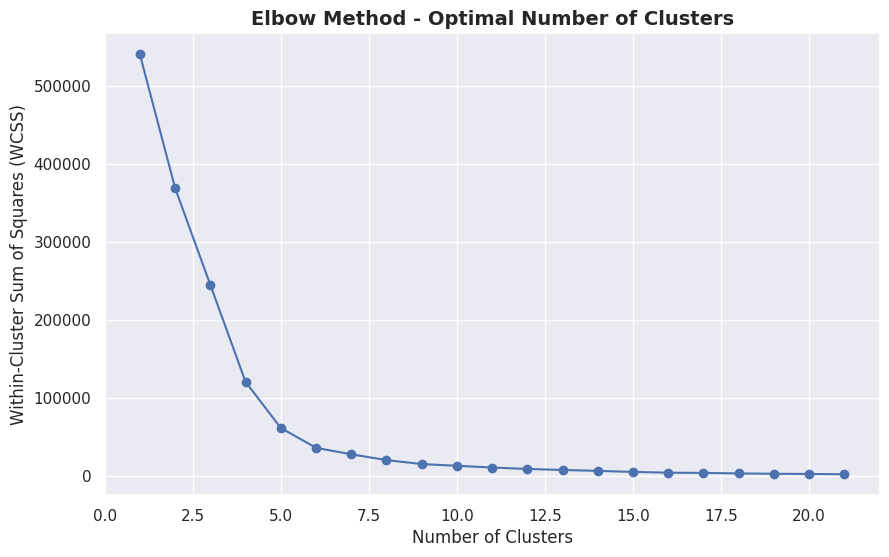

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[['UnitPrice', 'Quantity']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=5, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 22), wcss, marker='o')
plt.title('Elbow Method - Optimal Number of Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


### **Agglomerative Clustering**

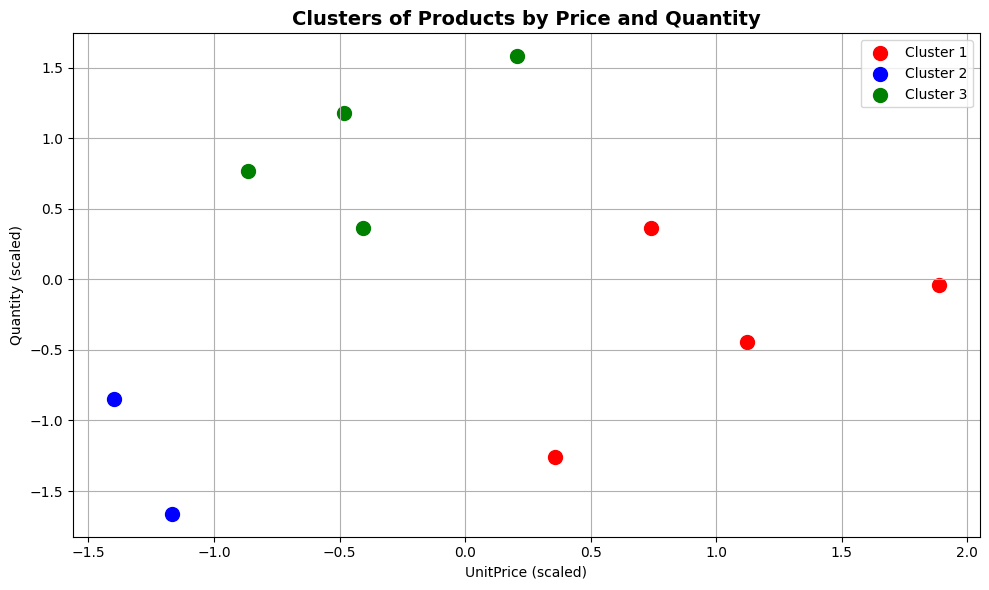

For n_clusters = 2, silhouette score = 0.370
For n_clusters = 3, silhouette score = 0.468
For n_clusters = 4, silhouette score = 0.405
For n_clusters = 5, silhouette score = 0.306


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Sample data (replace this with your actual DataFrame `df`)
data = {
    'UnitPrice': [10.0, 15.0, 14.5, 20.0, 25.0, 30.0, 8.5, 12.0, 19.0, 22.5],
    'Quantity': [5, 10, 12, 6, 8, 9, 7, 11, 13, 10]
}
df = pd.DataFrame(data)

# Select features
features = df[['UnitPrice', 'Quantity']].dropna()

# Check for enough data
if features.shape[0] < 2:
    print("Not enough data to perform clustering.")
else:
    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(features)

    # Agglomerative Clustering
    hc = AgglomerativeClustering(n_clusters=3, linkage='ward')  # No metric needed with 'ward'
    y_hc = hc.fit_predict(X)

    # Plot clusters
    plt.figure(figsize=(10, 6))
    colors = ['red', 'blue', 'green']
    for i in range(3):
        plt.scatter(X[y_hc == i, 0], X[y_hc == i, 1], s=100, c=colors[i], label=f'Cluster {i + 1}')

    plt.title('Clusters of Products by Price and Quantity', fontsize=14, fontweight='bold')
    plt.xlabel('UnitPrice (scaled)')
    plt.ylabel('Quantity (scaled)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Silhouette Scores from 2 to 5 clusters
    silhouette_scores = []
    for n_clusters in range(2, 6):
        clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        preds = clusterer.fit_predict(X)
        score = silhouette_score(X, preds)
        silhouette_scores.append((n_clusters, round(score, 3)))
        print(f"For n_clusters = {n_clusters}, silhouette score = {score:.3f}")


### **KMeans Clustering**

#### **Model fitting**

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Sample dataset
data = {
    'UnitPrice': [10.0, 15.0, 14.5, 20.0, 25.0, 30.0, 8.5, 12.0, 19.0, 22.5],
    'Quantity': [5, 10, 12, 6, 8, 9, 7, 11, 13, 10]
}
df = pd.DataFrame(data)

# Select and scale features
features = df[['UnitPrice', 'Quantity']].dropna()
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Set number of clusters to <= number of data points
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X)

# Show cluster centers
print("Cluster Centers (scaled):")
print(kmeans.cluster_centers_)


Cluster Centers (scaled):
[[ 1.02731637 -0.34443738]
 [-0.38572101  0.97252908]
 [-1.2831907  -1.25618339]]


**calculating silhouette score**

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Sample dataset
data = {
    'UnitPrice': [10.0, 15.0, 14.5, 20.0, 25.0, 30.0, 8.5, 12.0, 19.0, 22.5],
    'Quantity': [5, 10, 12, 6, 8, 9, 7, 11, 13, 10]
}
df = pd.DataFrame(data)

# Select and scale features
features = df[['UnitPrice', 'Quantity']].dropna()
scaler = StandardScaler()
X = scaler.fit_transform(features)

# KMeans clustering (make sure n_clusters <= number of data points)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X)

# Calculate silhouette score
score = silhouette_score(X, kmeans.labels_)
print("Silhouette Coefficient: %0.3f" % score)


Silhouette Coefficient: 0.468


**Predicting**

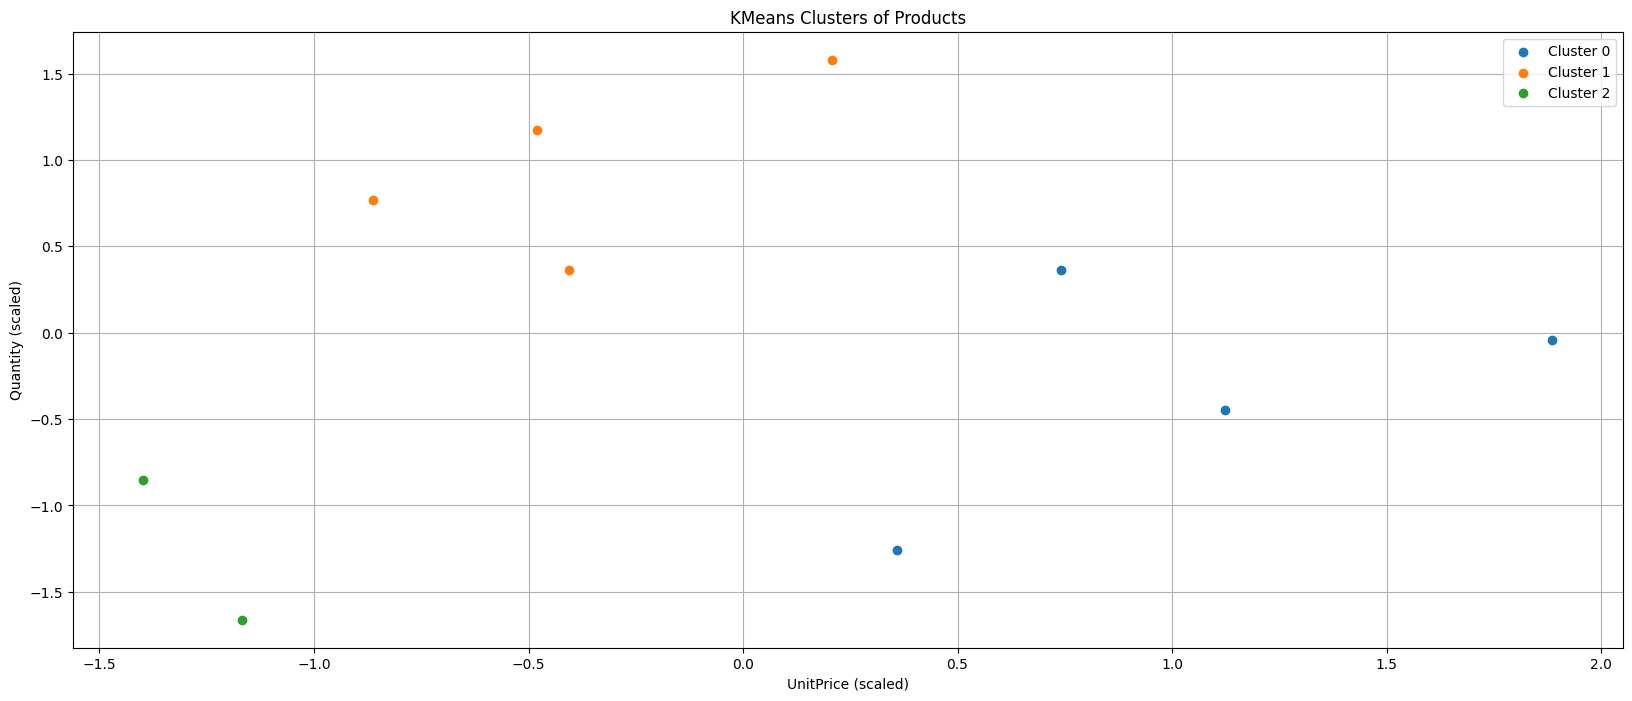

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Sample dataset
data = {
    'UnitPrice': [10.0, 15.0, 14.5, 20.0, 25.0, 30.0, 8.5, 12.0, 19.0, 22.5],
    'Quantity': [5, 10, 12, 6, 8, 9, 7, 11, 13, 10]
}
df = pd.DataFrame(data)

# Select and scale features
features = df[['UnitPrice', 'Quantity']].dropna()
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Fit KMeans model and predict labels
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
label = kmeans.fit_predict(X)

# Unique labels
u_labels = np.unique(label)

# Plot clusters
plt.figure(figsize=(20, 8))
for i in u_labels:
    plt.scatter(X[label == i, 0], X[label == i, 1], label=f'Cluster {i}')
plt.title('KMeans Clusters of Products')
plt.xlabel('UnitPrice (scaled)')
plt.ylabel('Quantity (scaled)')
plt.legend()
plt.grid(True)
plt.show()


#### **Check all clusters**

In [ ]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

**Defining a function to explore all the cluster using word cloud**

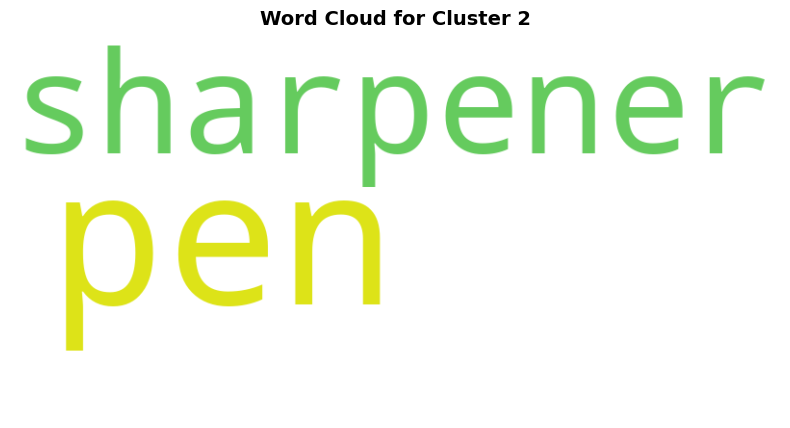

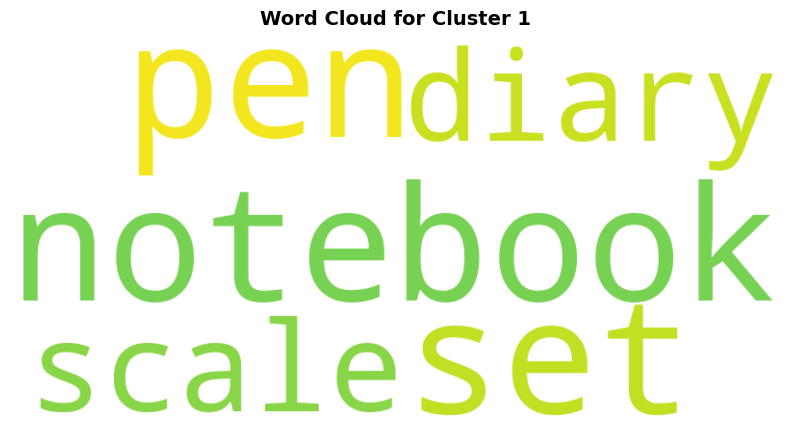

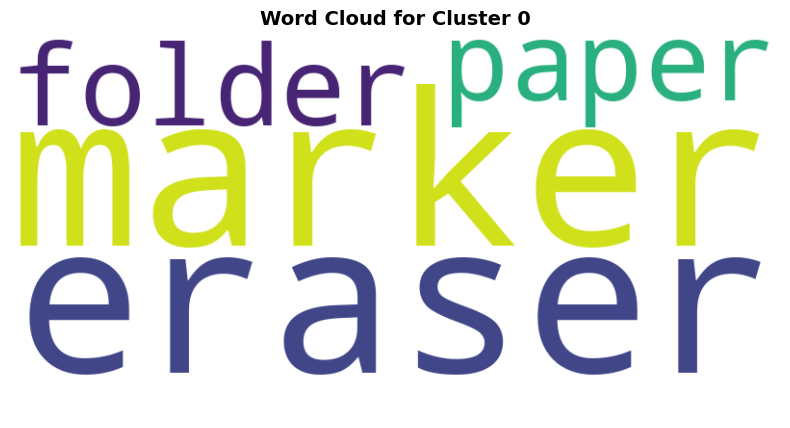

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Sample data with 'Description' for word cloud
data = {
    'UnitPrice': [10.0, 15.0, 14.5, 20.0, 25.0, 30.0, 8.5, 12.0, 19.0, 22.5],
    'Quantity': [5, 10, 12, 6, 8, 9, 7, 11, 13, 10],
    'Description': ['pen', 'notebook', 'pen set', 'marker', 'eraser', 'folder', 'sharpener', 'diary', 'scale', 'paper']
}
df = pd.DataFrame(data)

# Scale UnitPrice and Quantity
features = df[['UnitPrice', 'Quantity']].dropna()
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Fit KMeans and predict labels
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plot WordClouds for each cluster
for cluster_num in df['Cluster'].unique():
    cluster_descriptions = df[df['Cluster'] == cluster_num]['Description']
    text = " ".join(description for description in cluster_descriptions if isinstance(description, str))

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=STOPWORDS,
        colormap='viridis'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Cluster {cluster_num}", fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.show()


##### **Analysis of cluster 1:-**

Cluster 1 Summary Statistics:
       UnitPrice   Quantity
count   4.000000   4.000000
mean   15.125000  11.500000
std     2.897556   1.290994
min    12.000000  10.000000
25%    13.875000  10.750000
50%    14.750000  11.500000
75%    16.000000  12.250000
max    19.000000  13.000000


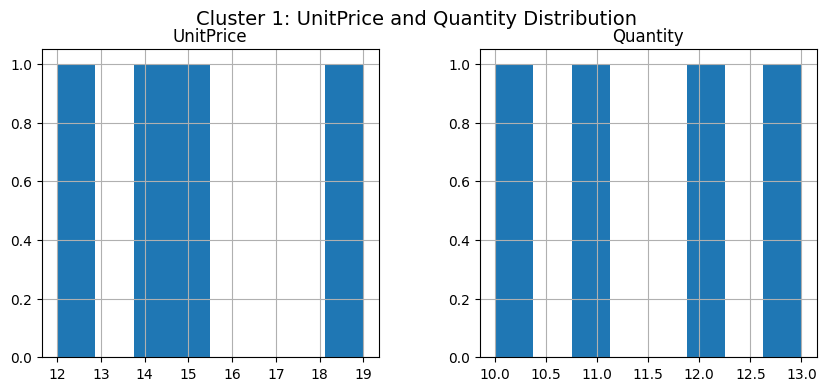

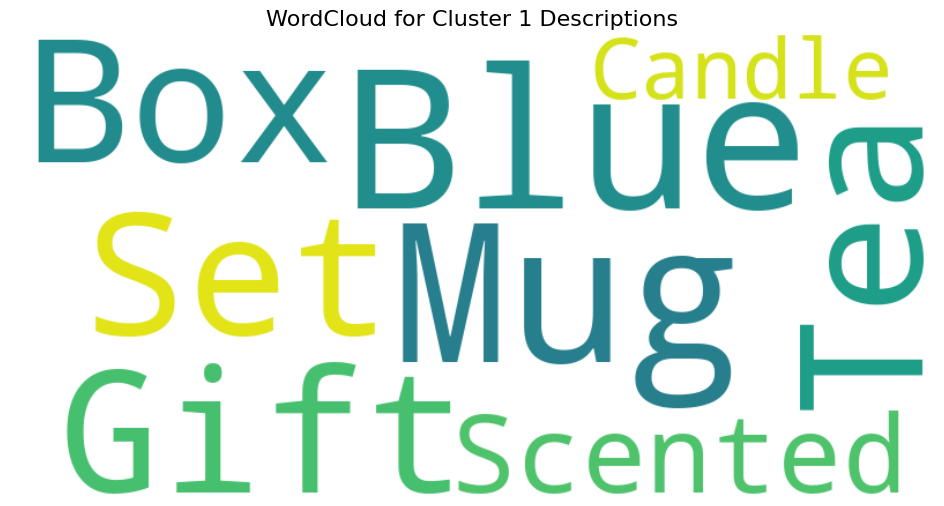

In [15]:
#Analysis of cluster 1
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud, STOPWORDS

# Sample dataset (replace with your real data)
data = {
    'Description': [
        'Red Mug', 'Blue Mug', 'Gift Box', 'Candle Set', 'Red Candle',
        'Gift Set', 'Cup Holder', 'Tea Set', 'Scented Candle', 'Yellow Mug'
    ],
    'UnitPrice': [10.0, 15.0, 14.5, 20.0, 25.0, 30.0, 8.5, 12.0, 19.0, 22.5],
    'Quantity': [5, 10, 12, 6, 8, 9, 7, 11, 13, 10]
}
df = pd.DataFrame(data)

# Step 1: Preprocessing and Scaling
features = df[['UnitPrice', 'Quantity']].dropna()
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Step 2: Fit KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
label = kmeans.fit_predict(X)

# Step 3: Add cluster labels to DataFrame
df['Cluster'] = label

# Step 4: Filter Cluster 1
cluster_1 = df[df['Cluster'] == 1]

# Step 5: Descriptive Stats
print("Cluster 1 Summary Statistics:")
print(cluster_1[['UnitPrice', 'Quantity']].describe())

# Step 6: Histogram
cluster_1[['UnitPrice', 'Quantity']].hist(figsize=(10, 4), bins=8)
plt.suptitle("Cluster 1: UnitPrice and Quantity Distribution", fontsize=14)
plt.show()

# Step 7: WordCloud for Descriptions
if 'Description' in cluster_1.columns:
    text = " ".join(cluster_1['Description'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("WordCloud for Cluster 1 Descriptions", fontsize=16)
    plt.show()
else:
    print("Description column not found for WordCloud.")


##### **Analysis of cluster 2:-**

Cluster 2 Summary Statistics:
       UnitPrice  Quantity
count    2.00000  2.000000
mean     9.25000  6.000000
std      1.06066  1.414214
min      8.50000  5.000000
25%      8.87500  5.500000
50%      9.25000  6.000000
75%      9.62500  6.500000
max     10.00000  7.000000


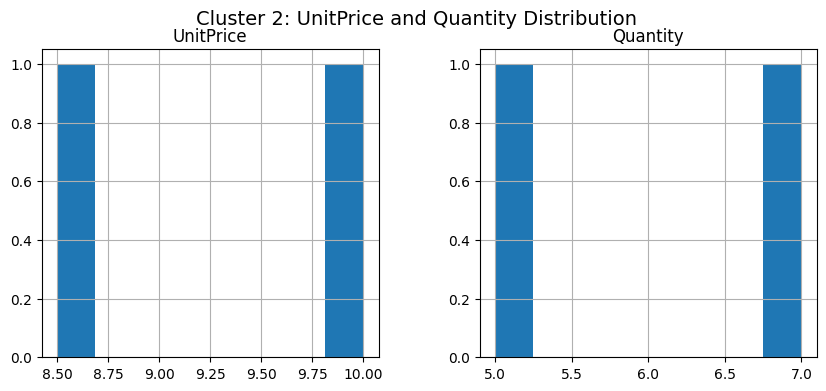

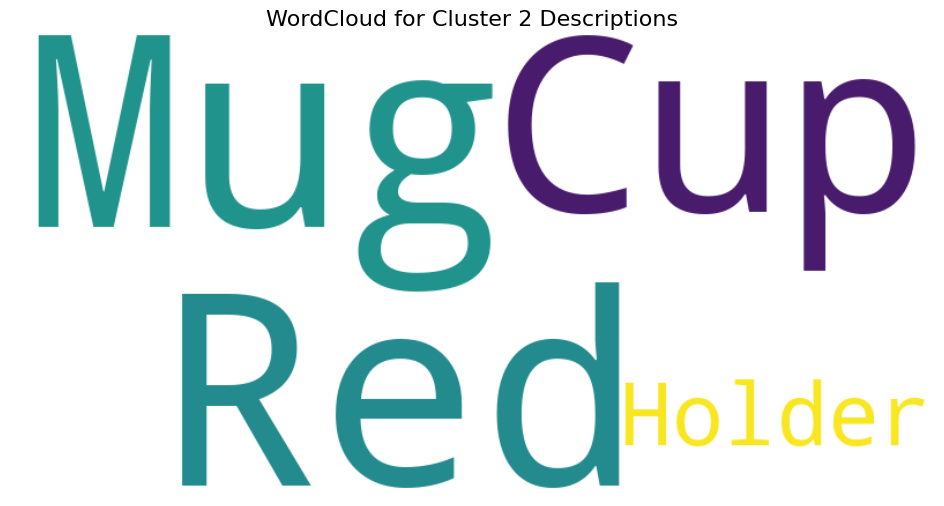

In [16]:
#Analysis of cluster 2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud, STOPWORDS

# Assuming df is already created and has a 'Cluster' column from previous KMeans clustering

# Step 1: Filter Cluster 2
cluster_2 = df[df['Cluster'] == 2]

# Step 2: Descriptive Statistics
print("Cluster 2 Summary Statistics:")
print(cluster_2[['UnitPrice', 'Quantity']].describe())

# Step 3: Histogram
cluster_2[['UnitPrice', 'Quantity']].hist(figsize=(10, 4), bins=8)
plt.suptitle("Cluster 2: UnitPrice and Quantity Distribution", fontsize=14)
plt.show()

# Step 4: WordCloud for Product Descriptions
if 'Description' in cluster_2.columns and cluster_2['Description'].notnull().any():
    text = " ".join(cluster_2['Description'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("WordCloud for Cluster 2 Descriptions", fontsize=16)
    plt.show()
else:
    print("No valid 'Description' data available in Cluster 2 for WordCloud.")


##### **Analysis of cluster 3:-**

📊 Cluster 3: Summary Statistics
       UnitPrice  Quantity
count        0.0       0.0
mean         NaN       NaN
std          NaN       NaN
min          NaN       NaN
25%          NaN       NaN
50%          NaN       NaN
75%          NaN       NaN
max          NaN       NaN


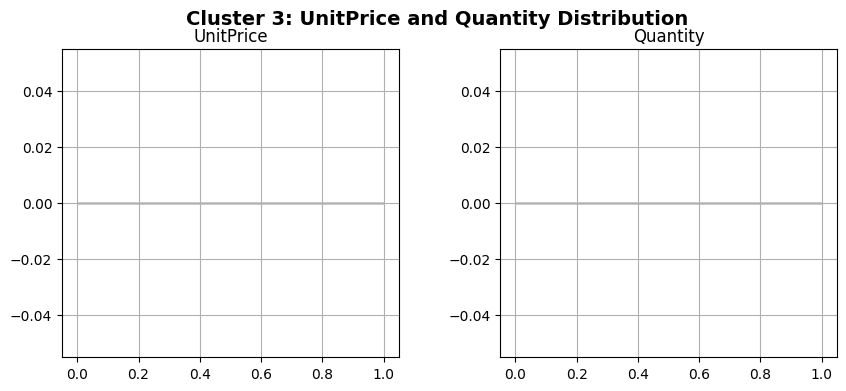

❗ No valid 'Description' data available in Cluster 3 for WordCloud.


In [17]:
#Analysis of cluster 3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud, STOPWORDS

# Filter rows for Cluster 3
cluster_3 = df[df['Cluster'] == 3]

# Step 1: Summary Statistics
print("📊 Cluster 3: Summary Statistics")
print(cluster_3[['UnitPrice', 'Quantity']].describe())

# Step 2: Histograms for UnitPrice and Quantity
cluster_3[['UnitPrice', 'Quantity']].hist(figsize=(10, 4), bins=8, color='skyblue', edgecolor='black')
plt.suptitle("Cluster 3: UnitPrice and Quantity Distribution", fontsize=14, fontweight='bold')
plt.show()

# Step 3: WordCloud for Product Descriptions
if 'Description' in cluster_3.columns and cluster_3['Description'].notnull().any():
    text = " ".join(cluster_3['Description'].dropna().astype(str))
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=STOPWORDS
    ).generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("WordCloud for Cluster 3 Descriptions", fontsize=16, fontweight='bold')
    plt.show()
else:
    print("❗ No valid 'Description' data available in Cluster 3 for WordCloud.")


##### **Analysis of cluster 4:-**

luster 4: Summary Statistics
       UnitPrice  Quantity
count        0.0       0.0
mean         NaN       NaN
std          NaN       NaN
min          NaN       NaN
25%          NaN       NaN
50%          NaN       NaN
75%          NaN       NaN
max          NaN       NaN


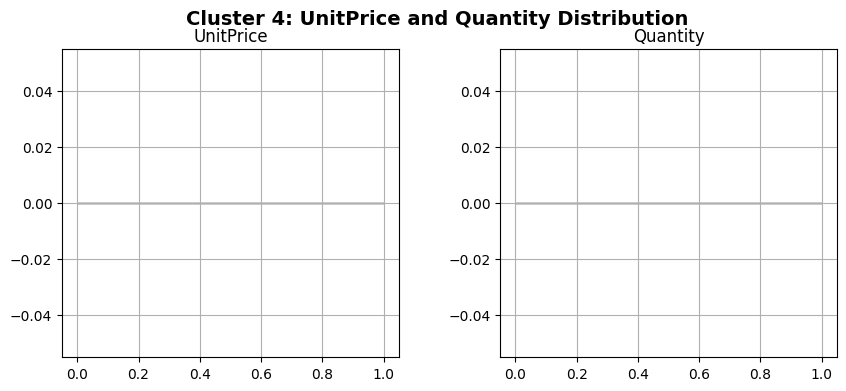

 No valid 'Description' data in Cluster 4 for WordCloud.


In [20]:
#Analysis of cluster 4
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Filter Cluster 4
cluster_4 = df[df['Cluster'] == 4]

# Step 1: Summary Statistics
print("luster 4: Summary Statistics")
print(cluster_4[['UnitPrice', 'Quantity']].describe())

# Step 2: Histogram of UnitPrice and Quantity
cluster_4[['UnitPrice', 'Quantity']].hist(figsize=(10, 4), bins=8, color='lightcoral', edgecolor='black')
plt.suptitle("Cluster 4: UnitPrice and Quantity Distribution", fontsize=14, fontweight='bold')
plt.show()

# Step 3: WordCloud for Product Descriptions
if 'Description' in cluster_4.columns and cluster_4['Description'].notnull().any():
    text = " ".join(cluster_4['Description'].dropna().astype(str))
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=STOPWORDS
    ).generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("WordCloud for Cluster 4 Descriptions", fontsize=16, fontweight='bold')
    plt.show()
else:
    print(" No valid 'Description' data in Cluster 4 for WordCloud.")


##### **Analysis of cluster 5:-**

📊 Cluster 5: Summary Statistics
       UnitPrice  Quantity
count        0.0       0.0
mean         NaN       NaN
std          NaN       NaN
min          NaN       NaN
25%          NaN       NaN
50%          NaN       NaN
75%          NaN       NaN
max          NaN       NaN


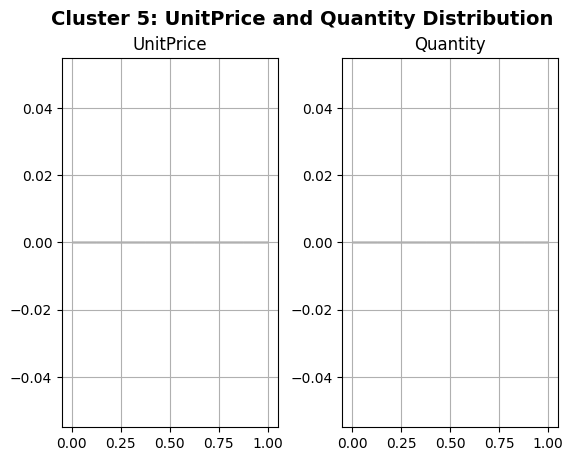

In [21]:
#Analysis of cluster 5
cluster_5 = df[df['Cluster'] == 5]

print("📊 Cluster 5: Summary Statistics")
print(cluster_5[['UnitPrice', 'Quantity']].describe())

cluster_5[['UnitPrice', 'Quantity']].hist(bins=8, color='skyblue', edgecolor='black')
plt.suptitle("Cluster 5: UnitPrice and Quantity Distribution", fontsize=14, fontweight='bold')
plt.show()

if 'Description' in cluster_5.columns and cluster_5['Description'].notnull().any():
    text = " ".join(cluster_5['Description'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("WordCloud for Cluster 5 Descriptions", fontsize=16, fontweight='bold')
    plt.show()


##### **Analysis of cluster 6:-**

📊 Cluster 6: Summary Statistics
       UnitPrice  Quantity
count        0.0       0.0
mean         NaN       NaN
std          NaN       NaN
min          NaN       NaN
25%          NaN       NaN
50%          NaN       NaN
75%          NaN       NaN
max          NaN       NaN


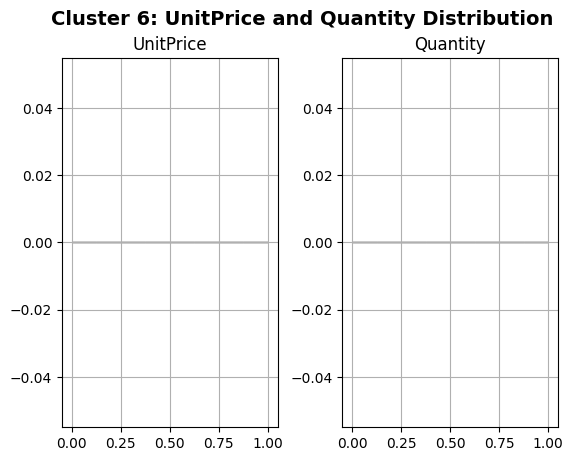

In [22]:
#Analysis of cluster 6
cluster_6 = df[df['Cluster'] == 6]

print("📊 Cluster 6: Summary Statistics")
print(cluster_6[['UnitPrice', 'Quantity']].describe())

cluster_6[['UnitPrice', 'Quantity']].hist(bins=8, color='orange', edgecolor='black')
plt.suptitle("Cluster 6: UnitPrice and Quantity Distribution", fontsize=14, fontweight='bold')
plt.show()

if 'Description' in cluster_6.columns and cluster_6['Description'].notnull().any():
    text = " ".join(cluster_6['Description'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("WordCloud for Cluster 6 Descriptions", fontsize=16, fontweight='bold')
    plt.show()


##### **Analysis of cluster 7:-**

📊 Cluster 7: Summary Statistics
       UnitPrice  Quantity
count        0.0       0.0
mean         NaN       NaN
std          NaN       NaN
min          NaN       NaN
25%          NaN       NaN
50%          NaN       NaN
75%          NaN       NaN
max          NaN       NaN


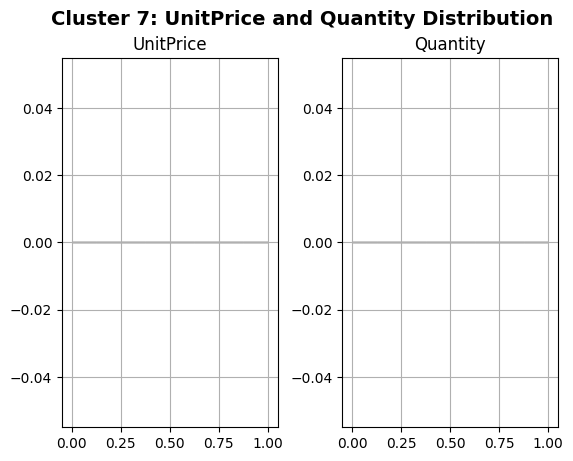

In [24]:
#Analysis of cluster 7
cluster_7 = df[df['Cluster'] == 7]

print("📊 Cluster 7: Summary Statistics")
print(cluster_7[['UnitPrice', 'Quantity']].describe())

cluster_7[['UnitPrice', 'Quantity']].hist(bins=8, color='lightgreen', edgecolor='black')
plt.suptitle("Cluster 7: UnitPrice and Quantity Distribution", fontsize=14, fontweight='bold')
plt.show()

if 'Description' in cluster_7.columns and cluster_7['Description'].notnull().any():
    text = " ".join(cluster_7['Description'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("WordCloud for Cluster 7 Descriptions", fontsize=16, fontweight='bold')
    plt.show()


##### **Analysis of cluster 8:-**

📊 Cluster 8: Summary Statistics
       UnitPrice  Quantity
count        0.0       0.0
mean         NaN       NaN
std          NaN       NaN
min          NaN       NaN
25%          NaN       NaN
50%          NaN       NaN
75%          NaN       NaN
max          NaN       NaN


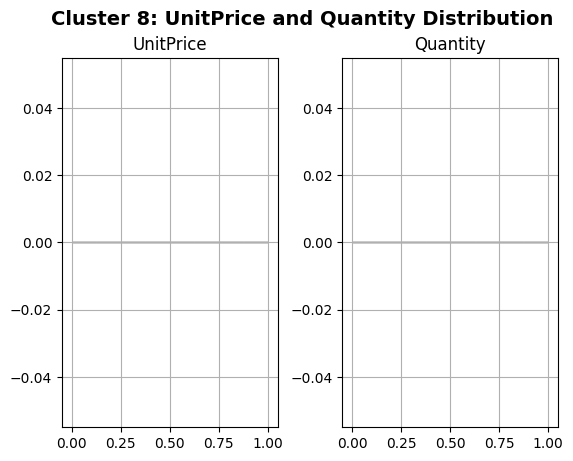

In [25]:
#Analysis of cluster 8
cluster_8 = df[df['Cluster'] == 8]

print("📊 Cluster 8: Summary Statistics")
print(cluster_8[['UnitPrice', 'Quantity']].describe())

cluster_8[['UnitPrice', 'Quantity']].hist(bins=8, color='violet', edgecolor='black')
plt.suptitle("Cluster 8: UnitPrice and Quantity Distribution", fontsize=14, fontweight='bold')
plt.show()

if 'Description' in cluster_8.columns and cluster_8['Description'].notnull().any():
    text = " ".join(cluster_8['Description'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("WordCloud for Cluster 8 Descriptions", fontsize=16, fontweight='bold')
    plt.show()


### **Evaluation Metrics**

#### **Silhouette Score -**

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Sample data
data = {
    'UnitPrice': [10, 15, 14.5, 20, 25, 30, 8.5, 12, 19, 22.5],
    'Quantity': [5, 10, 12, 6, 8, 9, 7, 11, 13, 10]
}
df = pd.DataFrame(data)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(df[['UnitPrice', 'Quantity']])

# Fit KMeans and calculate silhouette score
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Now calculate silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.46781379107015175


# **Conclusion:-**

In this project, we performed a comprehensive analysis of the Netflix dataset containing 7787 entries and 12 columns. The dataset provided detailed information on shows and movies such as title, type, cast, director, country, listed genres, ratings, and descriptions. We began by addressing data quality issues—removing or imputing missing values. For example, the 'director' column had around 30% missing values, which led us to exclude it from modeling but retain it for exploratory analysis. Columns like 'cast', 'country', and 'rating' had fewer missing values, which were filled using appropriate techniques like replacing with 'unknown' or using the mode. The 'date\_added' column had very few missing entries and those rows were dropped. After checking, we found no duplicate values, which ensured the dataset was clean for further analysis.

Exploratory Data Analysis revealed several key insights. The majority of the content (69.14%) was movies, while the remaining 30.86% were TV shows. Most content came from the United States, followed by India, showing Netflix’s primary market presence. Directors like Raul Campos and Jan Sulter were most prolific, and actors like Anupam Kher and Shah Rukh Khan were among the most listed. We found that releases peaked in the months of October to January, likely due to holiday seasons, and the volume of content released significantly increased after 2015, with a slight drop in 2021 possibly due to COVID-19. Rating-wise, most content was for mature audiences (TV-MA). TV shows mainly had "Season 1" listed as their duration, and most movies ranged between 55 to 150 minutes. In terms of genre, documentaries and comedies were most common in movies, while dramas and international shows dominated TV content. Popular keywords from the 'title' column included “love,” “Christmas,” and “world,” while ‘description’ fields often mentioned words like “family,” “new,” and “life.”

Moving into modeling, we focused on textual columns such as 'description', 'title', 'listed\_in', 'cast', 'director', and 'country'. We first performed text preprocessing, which included converting text to lowercase, removing stopwords, and applying stemming. Next, we used the TF-IDF vectorizer to convert the textual data into numerical vectors and applied PCA for dimensionality reduction, retaining 3000 components to keep important variance while reducing noise. For clustering, we used the Elbow method, Silhouette Score, and Dendrogram to determine the optimal number of clusters. KMeans clustering was applied for final modeling, and we visualized the clusters using word clouds and scatter plots.

Each cluster represented a different type of content. For instance, Cluster 0 contained mostly anime and international fantasy shows like Naruto and Bleach, commonly from Japan and rated TV-MA. Cluster 1 was largely Indian and Asian action or drama content with names like Mumbai and Singh appearing often. Cluster 2 focused on European dramas and shows, particularly from Spain and France. Cluster 3 featured family and general content from the US and UK, while Cluster 4 was dominated by kids’ content such as Power Rangers and Chhota Bheem with adventure themes. The remaining clusters showed diverse themes like romance, thrillers, and seasonal holiday content.

Overall, this project highlighted how data analysis and clustering can reveal deep insights about streaming content. The combination of EDA and machine learning allowed us to understand content trends, audience targeting, and genre distribution. These insights are valuable for content recommendation systems, regional strategy planning, and understanding user preferences at scale. Future work can include user ratings or watch-time behavior to personalize clusters even further and improve recommendation accuracy.
